## Purpose: Non-linear fit

 Demonstration: 
     1. Arctan Model
     2. LevenbergMarquardtFitter
 
 Author: Do Kester


import stuff

In [1]:
import numpy as numpy
import math

from BayesicFitting import ArctanModel
from BayesicFitting import PolynomialModel
from BayesicFitting import LevenbergMarquardtFitter
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
import matplotlib.pyplot as plt

define some constants

In [2]:
N = 101
x0 = 60             # x position of arctanian
seed = 3456


make data as a set of +1 or -1 values.

In [3]:
x = numpy.linspace( 20.0, 100.0, N, dtype=float )
numpy.random.seed( seed )
y = numpy.where( ( x + 10 * numpy.random.randn( N ) ) > x0, 1.0, 0.0 )
#x += x0


Define the model

In [4]:
arctan = ArctanModel()
arctan += PolynomialModel(0)
print( arctan )
initial = [0.5,50,1,-0.5]
arctan.parameters = initial


Arctan: f( x:p ) = p_0 * arctan( p_2 * ( x - p_1 ) ) +
Polynomial: f( x:p ) = p_3


define the fitter: LevenbergMarquart

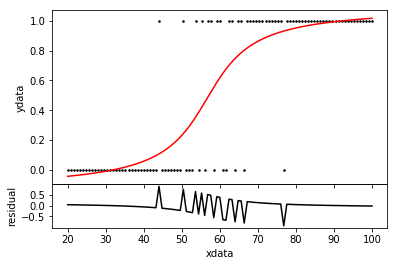

In [5]:
fitter = LevenbergMarquardtFitter( x, arctan )
 
# find the parameters
param = fitter.fit( y, plot=True )

  

In [6]:
print( "Parameters :", fmt( param ) )
print( "StDevs     :", fmt( fitter.stdevs ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

Parameters : [    0.394   56.645    0.110    0.480]
StDevs     : [    0.058    2.236    0.048    0.041]
Chisq      :     7.534
Scale      :     0.279
Covar matrix :
[[    0.003   -0.015   -0.002   -0.000]
 [   -0.015    4.999    0.009    0.067]
 [   -0.002    0.009    0.002    0.000]
 [   -0.000    0.067    0.000    0.002]]
